In [ ]:
import zipfile
import os

# Define the paths
zip_file_path = '/content/drive/My Drive/archive (2).zip'  # Adjust the path accordingly
destination_folder = '/content/lions_dataset'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Extracted files to: /content/lions_dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [ ]:
data_dir='/content/lions_dataset/images'
dataset=datasets.ImageFolder(data_dir,transform=transform)


In [ ]:
from torch.utils.data import DataLoader,random_split
train_size=int(0.8*len(dataset))
test_size=len(dataset)-train_size
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

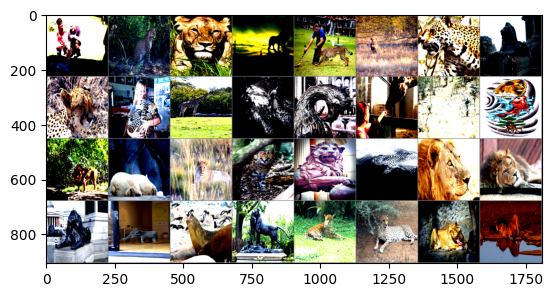

Cheetahs Cheetahs Cheetahs Lions Cheetahs Lions Cheetahs Lions Cheetahs Cheetahs Cheetahs Cheetahs Lions Cheetahs Cheetahs Lions Lions Lions Lions Cheetahs Lions Cheetahs Lions Lions Lions Lions Lions Lions Cheetahs Cheetahs Lions Lions


In [ ]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{dataset.classes[labels[j]]:5}' for j in range(32)))

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,256)
    self.fc3=nn.Linear(256,2)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model=CustomCNN().to(device)


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
num_epochs=10
for epoch in range(num_epochs):
  model.train()
  total=0
  correct=0
  running_loss=0.0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
    running_loss+=loss.item()

  epoch_loss=running_loss/len(train_loader)
  epoch_acc=100*correct/total
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')


Epoch [1/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [2/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0001, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0001, Accuracy: 100.00%


In [ ]:
model.eval()
test_total=0
test_correct=0
with torch.no_grad():
  for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    test_total+=labels.size(0)
    test_correct+=(predicted==labels).sum().item()
  test_acc=100*test_correct/test_total
  print(f'Test Accuracy: {test_acc:.2f}%')

Test Accuracy: 57.50%
